## Clustering(군집화)
+ 대표적인 비지도학습 알고리즘
+ label이 없는 데이터를 그룹화

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import cluster, mixture
from sklearn.datasets import make_circles, make_moons, make_blobs
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler

In [44]:
def plot_data(dataset, position, title):
    X, y = dataset
    plt.subplot(position)
    plt.title(title)
    plt.scatter(X[:,0], X[:,1]);

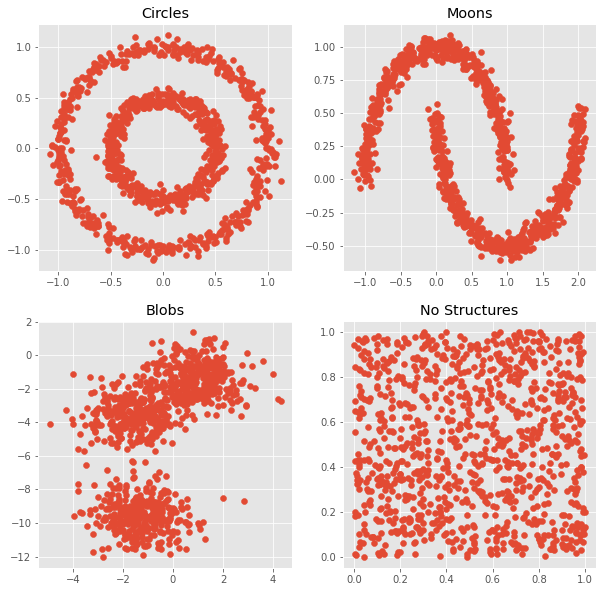

In [45]:
np.random.seed(0)
n_samples = 1000
random_state = 2
noise = 0.05

circles = make_circles(n_samples=n_samples, factor=0.5, noise=noise, random_state=random_state)
moons = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples, 2), None

plt.figure(figsize=(10,10))
plot_data(circles, 221, 'Circles')
plot_data(moons, 222, 'Moons')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No Structures');

In [46]:
def fit_predict_plot(model, dataset, position, title):
    X, y = dataset
    model.fit(X)
    if hasattr(model, 'labels_'):  #model에 'label_'이라는 attribute가 있다면
        labels = model.labels_.astype(np.int)
    else:
        labels = model.predict(X)
    
    colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0','#F6B352', '#519D9E', '#D81159', '#8CD790', '#353866'])
    ax = plt.subplot(position)
    ax.set_title(title)
    ax.scatter(X[:,0], X[:,1], color=colors[labels])

## K-Means Clustering
+ k를 지정해주면 k개의 등분산그룹으로 군집화
+ 중심점의 제곱합 함수를 최소화하는 방향으로 학습
+ 중심점 : 각 군집의 평균값

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

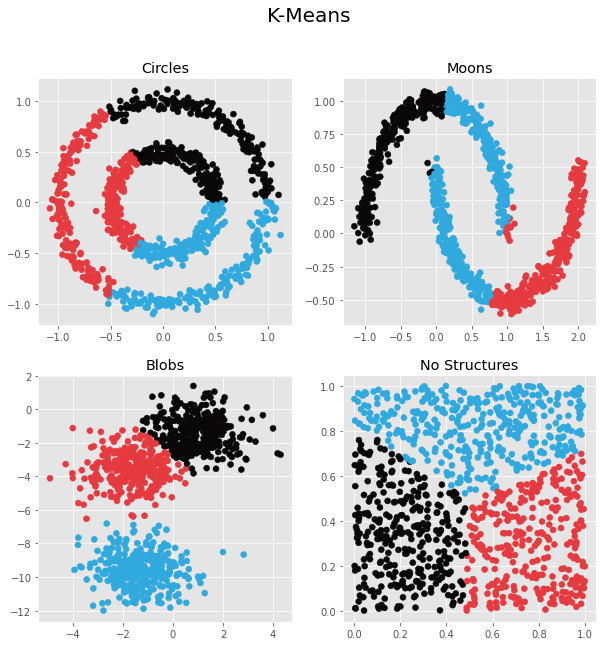

In [47]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('K-Means', fontsize=20)

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')

In [48]:
iris = load_iris()

In [49]:
model = cluster.KMeans(n_clusters=len(iris.target_names))
model.fit(iris.data)
y_pred = model.predict(iris.data)

idx0 = np.where(y_pred==0)
idx1 = np.where(y_pred==1)
idx2 = np.where(y_pred==2)

idx0, idx1, idx2

((array([ 52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
         115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132,
         134, 135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
        dtype=int64),),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        dtype=int64),),
 (array([ 50,  51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
          64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 106, 113, 114,
         119, 121, 123, 126, 127, 133, 138, 142, 146, 149], dtype=int64),))

## Mini Batch K-Means
+ K-Means에 배치 처리를 통해 계산시간을 줄임
+ K-Means와 결과가 다를 수 있음

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

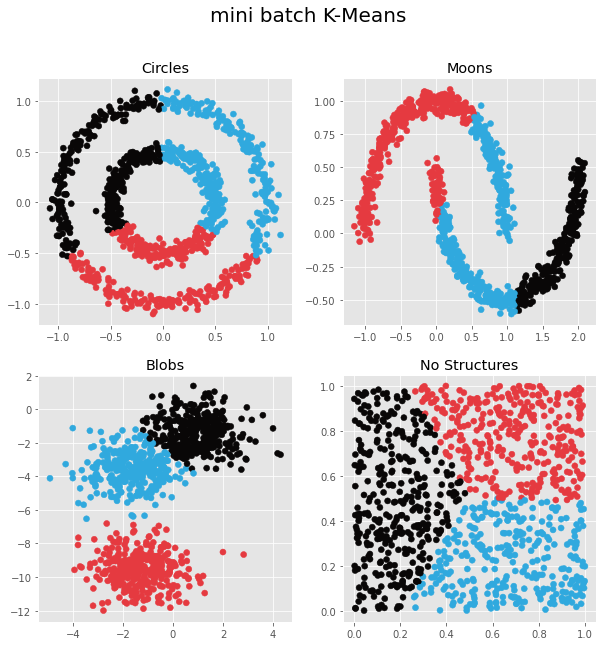

In [50]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('mini batch K-Means', fontsize=20)

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), no_structures, 224, 'No Structures')

## Affinity Propagation
+ 샘플 쌍끼리 메시지를 보내 군집 생성
+ 샘플을 대표하는 적절한 예를 찾을 때까지 반복
+ 군집의 개수를 자동으로 정함 => k를 지정해주지 않아도 됨

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)


IndexError: index 171 is out of bounds for axis 0 with size 9

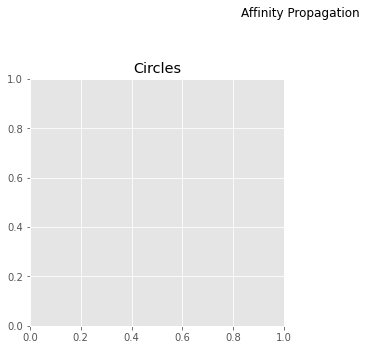

In [51]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Affinity Propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), moons, 222, 'Moons')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), no_structures, 224, 'No Structures')

## Mean Shift
+ 중심점 후보를 정해진 구역 내 평균으로 업데이트

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

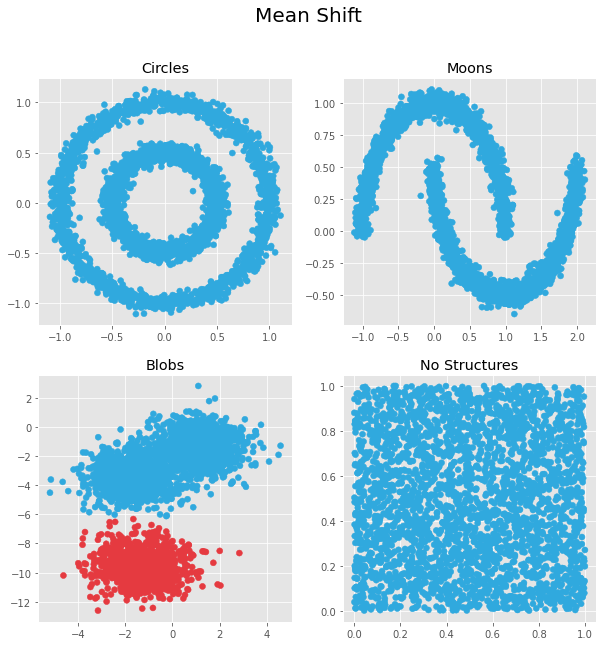

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Mean Shift', fontsize=20)

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moons, 222, 'Moons')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'No Structures')

## Spectral Clustering(스펙트럴 클러스터링)
+ spectral : 행렬의 고유값(eigenvalue)을 의미
+ 같은 군집 내 요소끼리의 유사도는 큰 값을, 다른 군집 내 요소와의 유사도는 작은 값을 가지게 하기 위해 고유벡터 필요

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

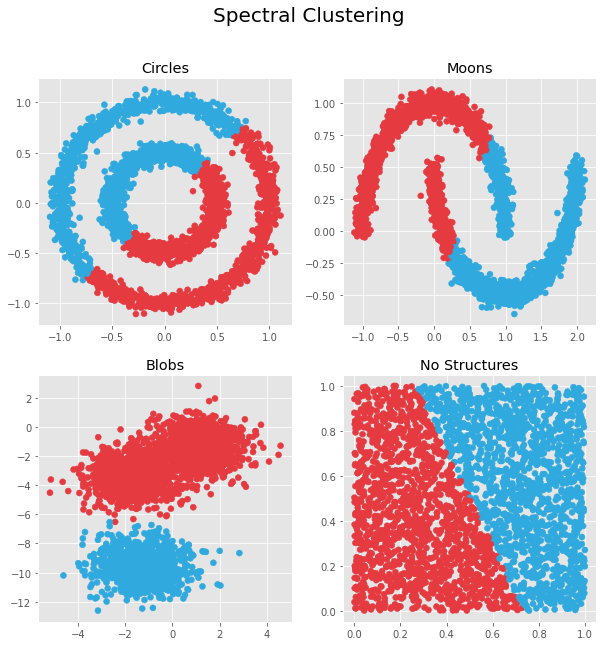

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Spectral Clustering', fontsize=20)

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), moons, 222, 'Moons')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), no_structures, 224, 'No Structures')

In [ ]:
cancer = load_breast_cancer()

In [ ]:
model = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity='nearest_neighbors')
model.fit(cancer.data)
y_pred = model.labels_

idx = np.where(y_pred==0)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## Hierarchical Clustering(계층 군집화)
+ 순차적, 계층적으로 유사한 데이터끼리 군집화
+ Dendrogram(계층적 트리 모형)을 이용

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

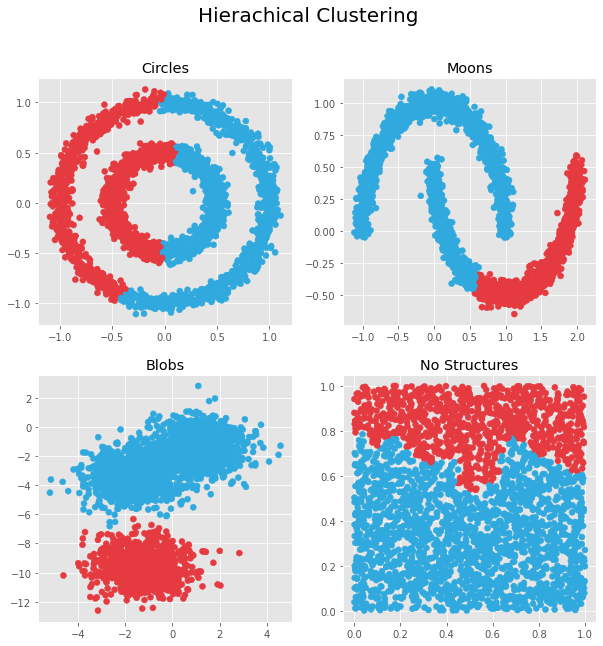

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Hierachical Clustering', fontsize=20)

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), moons, 222, 'Moons')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), no_structures, 224, 'No Structures')

In [ ]:
wine = load_wine()

In [ ]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
y_pred = model.labels_

idx = np.where(y_pred==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

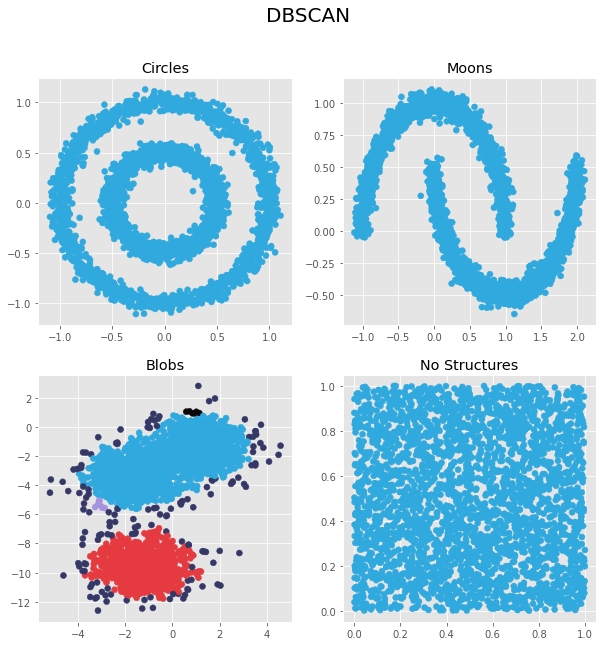

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('DBSCAN', fontsize=20)

fit_predict_plot(cluster.DBSCAN(eps=0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.DBSCAN(eps=0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=0.3), no_structures, 224, 'No Structures')

## OPTICS(Ordering Points To Identify the Clustering Structure)

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

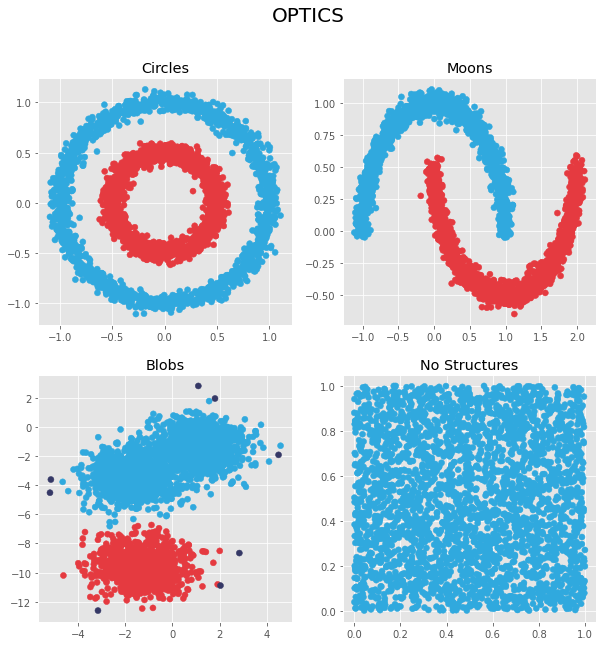

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('OPTICS', fontsize=20)

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moons, 222, 'Moons')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'No Structures')

## Birch(Balanced iterative reducing and clustering using hierachies)
+ 한 번만 Dataset을 검사하여 cluster를 만들며, 모든 데이터나 클러스터링을 스캔하지 않고도 군집화
+ 선형적인 비용이 증가하며 단일 스캔으로도 좋은 효과를 발휘
+ I/O 비용을 최소화 하면서 최상의 Cluster를 위해 사용가능한 메모리를 최대한 활용
+ crowded한 공간은 단일 클러스터로 인식하며, sparse한 부분은 아웃라이어로 취급되며 제거도 가능

C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = model.labels_.astype(np.int)
C:\Users\yeonok\AppData\Local\Temp/ipykernel_14948/1556180842.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release 

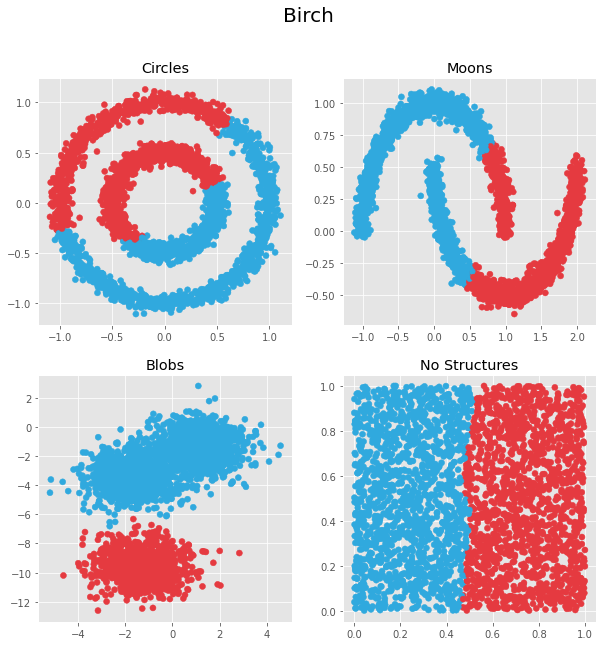

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Birch', fontsize=20)

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), moons, 222, 'Moons')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=0.3), no_structures, 224, 'No Structures')

## 손글씨데이터 클러스터링

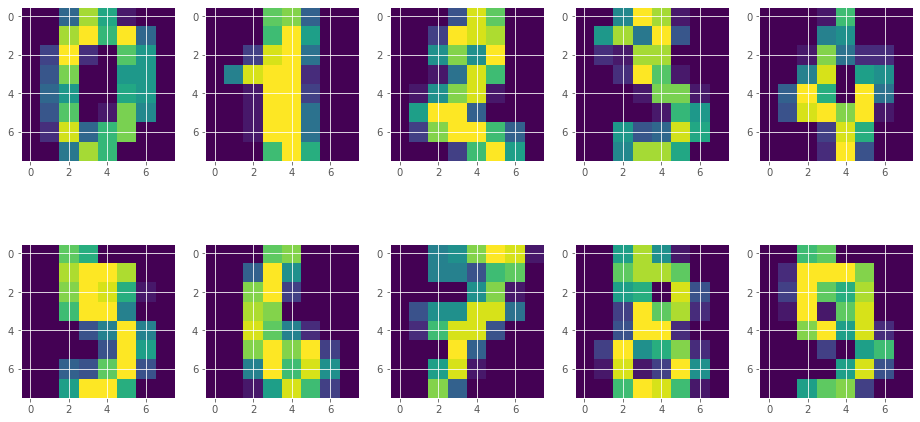

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data.reshape(-1, 8, 8)
y = digits.target

plt.figure(figsize=(16,8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])

Cluster 1 : [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 4
 4 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 4 4 4]
Cluster 2 : [1 2 8 8 8 8 2 2 8 2 9 8 1 6 8 1 8 2 2 8 8 8 8 8 8 8 8 8 8 4 8 8 4 8 8 8 8
 8 1 1 8 1 8 8 8 1 1 1 1 1 1 1 8 1 1 8 8 8 6 2 8 8 8 8 8 9 8 8 8 8 1 8 8 8
 8 1 1 8 1 8 1 1 8 2 1 1 1 1 1 1 8 1 1 8 8 8 1 1 1 8 1 1 1 8 1 1 1 1 1 1 8
 8 1 1 8 1 8 1 1 8 1 1 1 1 1 1 8 1 1 8 8 8 8 1 8 1 1 1 1 1 1 1 1 8 1 8 8 8
 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 1 7 8 1 1 8 8 1 3 1 7 8 1 3 3
 4 1 8 1 1 4 1 1 8 1 1 8 1 1 3 8 1 8 8 1 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 8 8
 8 8]
Cluster 3 : [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 6 6 6 6 1 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 8 6 6 6

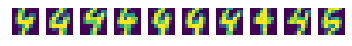

Cluster : 2


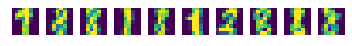

Cluster : 3


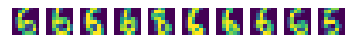

Cluster : 4


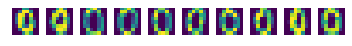

Cluster : 5


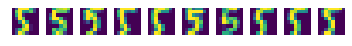

Cluster : 6


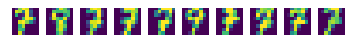

Cluster : 7


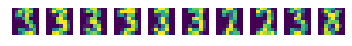

Cluster : 8


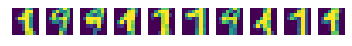

Cluster : 9


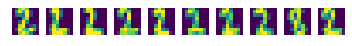

Cluster : 10


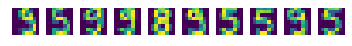

In [ ]:
#K-Means
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
y_pred = kmeans.predict(digits.data)

for i in range(10):
    idx = np.where(y_pred==i)
    real_class = digits.target[idx]
    print(f'Cluster {i+1} : {real_class}')
    
for i in range(10):
    idx = np.where(y_pred==i)[0]
    choice_idx = np.random.choice(idx, size=10)
    choice_img = X[choice_idx]
    
    k = 1
    
    print(f'Cluster : {i+1}')
    for img in choice_img:
        plt.subplot(1, 10, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        k+=1
    plt.show()

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 3 5 5 5 5]
Cluster 2 : [1 2 8 8 8 8 8 2 2 8 2 2 9 2 8 2 1 8 1 3 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 1 8 1 8 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 6 2 8 8 8
 8 8 8 8 9 8 8 8 8 8 1 8 8 8 8 8 1 8 1 8 1 8 8 8 1 1 8 1 1 8 1 1 1 1 8 1 1
 8 8 8 8 8 1 8 1 1 8 8 8 1 1 8 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 1 8 1 8 1 8 8 8 1 1 8 1 1 9 8 1 1 1 1 8 1 1 8 8 8 8 8 8 8 1 8 8 8 1 3 8
 1 1 8 1 1 1 1 8 1 1 8 8 8 8 8 8 1 8 8 8 8 1 1 8 1 8 1 1 1 8 1 1 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 1 8 1 1 8 8 8 1 3 1 8 1 3 3 3 1 8 1 1 1 1 8 1 1 4 8
 8 1 8 1 8 1 8 8 8 1 3 1 8 1 3 3 1 8 1 1 1 1 8 1 1 8 8 8 8 8]
Cluster 3 : [6 6 6 6 6 

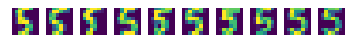

Cluster : 2


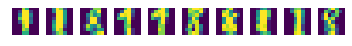

Cluster : 3


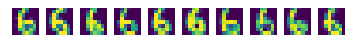

Cluster : 4


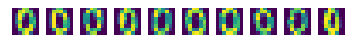

Cluster : 5


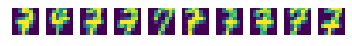

Cluster : 6


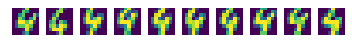

Cluster : 7


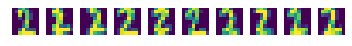

Cluster : 8


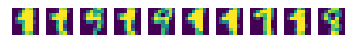

Cluster : 9


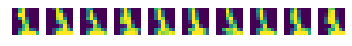

Cluster : 10


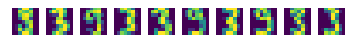

In [ ]:
#Spectral Clustering
spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity='nearest_neighbors')
spectral.fit(digits.data)
y_pred = spectral.labels_

for i in range(10):
    idx = np.where(y_pred==i)
    real_class = digits.target[idx]
    print(f'Cluster {i+1} : {real_class}')
    
for i in range(10):
    idx = np.where(y_pred==i)[0]
    choice_idx = np.random.choice(idx, size=10)
    choice_img = X[choice_idx]
    
    k = 1
    
    print(f'Cluster : {i+1}')
    for img in choice_img:
        plt.subplot(1, 10, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        k+=1
    plt.show()

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

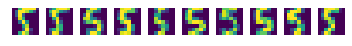

Cluster : 2


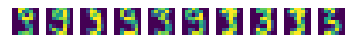

Cluster : 3


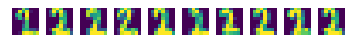

Cluster : 4


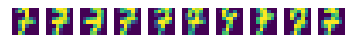

Cluster : 5


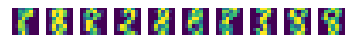

Cluster : 6


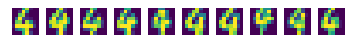

Cluster : 7


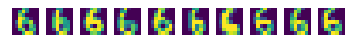

Cluster : 8


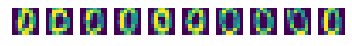

Cluster : 9


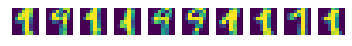

Cluster : 10


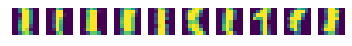

In [ ]:
#Heirarchical Clustering
heirarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
heirarchical.fit(digits.data)
y_pred = heirarchical.labels_

for i in range(10):
    idx = np.where(y_pred==i)
    real_class = digits.target[idx]
    print(f'Cluster {i+1} : {real_class}')
    
for i in range(10):
    idx = np.where(y_pred==i)[0]
    choice_idx = np.random.choice(idx, size=10)
    choice_img = X[choice_idx]
    
    k = 1
    
    print(f'Cluster : {i+1}')
    for img in choice_img:
        plt.subplot(1, 10, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        k+=1
    plt.show()

Cluster 1 : [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2 : [3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9

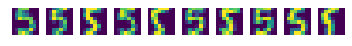

Cluster : 2


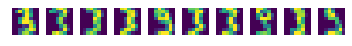

Cluster : 3


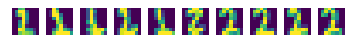

Cluster : 4


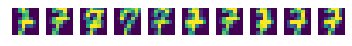

Cluster : 5


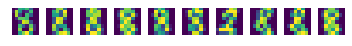

Cluster : 6


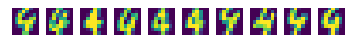

Cluster : 7


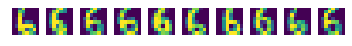

Cluster : 8


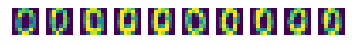

Cluster : 9


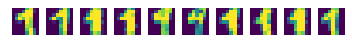

Cluster : 10


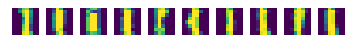

In [56]:
#Birch
birch = cluster.Birch(n_clusters=10, threshold=0.3)
birch.fit(digits.data)
y_pred = birch.labels_

for i in range(10):
    idx = np.where(y_pred==i)
    real_class = digits.target[idx]
    print(f'Cluster {i+1} : {real_class}')
    
for i in range(10):
    idx = np.where(y_pred==i)[0]
    choice_idx = np.random.choice(idx, size=10)
    choice_img = X[choice_idx]
    
    k = 1
    
    print(f'Cluster : {i+1}')
    for img in choice_img:
        plt.subplot(1, 10, k)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        k+=1
    plt.show()